# Hierarchical Clustering

TODO: def

### Importing the dataset

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [70]:
dataset = pd.read_csv("./filez/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

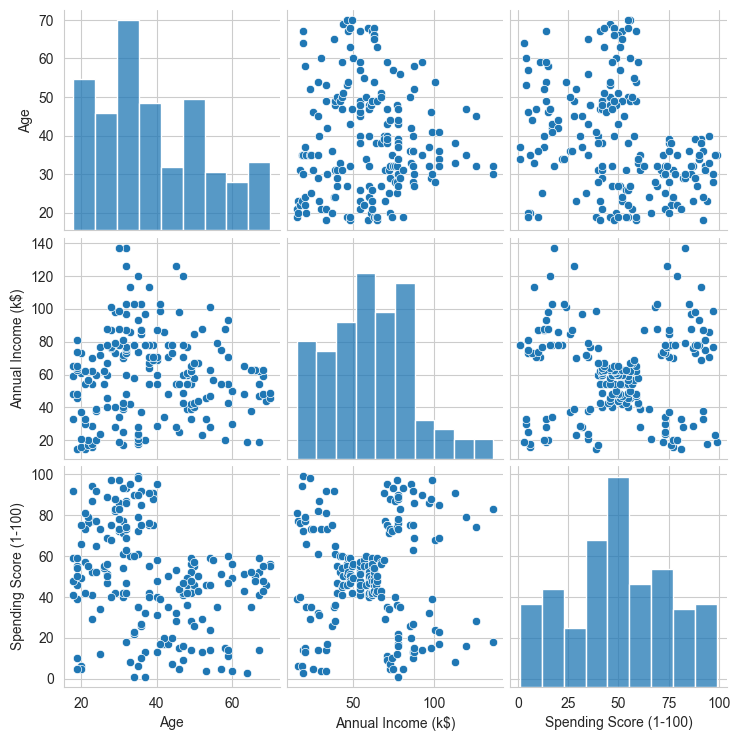

In [71]:
sns.pairplot(data=dataset.drop('CustomerID', axis=1))

### Data preprocessing

In [72]:
# convert categorical field 'Genre' to numerical
dataset["Genre"] = dataset["Genre"].map({"Male": 1, "Female": 0})
dataset.drop('CustomerID', axis=1, inplace=True)
dataset = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Dendrogram method to find the optimal # of clusters

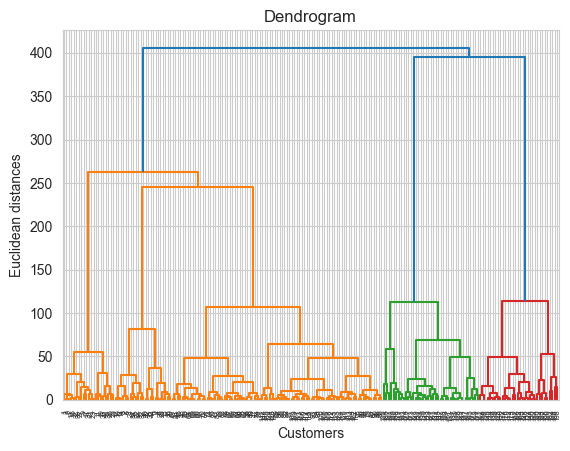

In [73]:
import scipy.cluster.hierarchy as sch

# method: 'ward' -> minimizing the variance inside the clusters
dendrogram = sch.dendrogram(sch.linkage(dataset, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Starting from the top (in this case, right blue line on the right):
1) For each horizontal line, get the distance until the next horizontal line
2) The largest distance between horizontal lines is the candidate # of clusters

### Training the Hierarchical model on the dataset

In [74]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc.fit(dataset)
hc.get_params()

{'affinity': 'deprecated',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 5}

In [75]:
y_hc = hc.fit_predict(dataset)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### Visualising the clusters

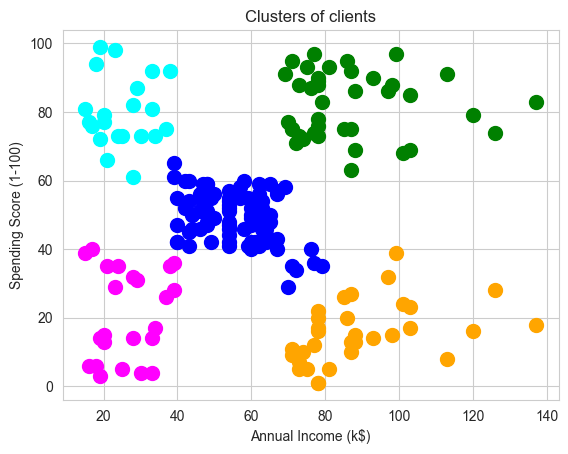

In [76]:
# scatter plot for each cluster
plt.scatter(
    x=dataset.iloc[y_hc == 0, 0],
    y=dataset.iloc[y_hc == 0, 1],
    s=100,
    c="orange",
)
plt.scatter(
    x=dataset.iloc[y_hc == 1, 0],
    y=dataset.iloc[y_hc == 1, 1],
    s=100,
    c="blue",
)
plt.scatter(
    x=dataset.iloc[y_hc == 2, 0],
    y=dataset.iloc[y_hc == 2, 1],
    s=100,
    c="green",
)
plt.scatter(
    x=dataset.iloc[y_hc == 3, 0],
    y=dataset.iloc[y_hc == 3, 1],
    s=100,
    c="cyan",
)
plt.scatter(
    x=dataset.iloc[y_hc == 4, 0],
    y=dataset.iloc[y_hc == 4, 1],
    s=100,
    c="magenta",
)
plt.title("Clusters of clients")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()